In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from enum import Enum
import csv
import pandas as pd
import os

In [14]:
def list_files(startpath):
    matrix_files = []
    core_files = []
    slurm_files = []

    # Puts file names in lists of matrix, core or slurm files based on name (not very robust)
    print(
        "This Folder contains {len_folder} file(s).".format(
            len_folder=len(startpath)
        )
    )

    for file in startpath:
        print(file)
        if "matrx" in file:
            matrix_files.append(file)
        elif "core" in file:
            core_files.append(file)
        elif "slurm" in file:
            slurm_files.append(file)

    return matrix_files, core_files, slurm_files

In [17]:
matr_folder = os.listdir("outputs/matrix_scaling")  # You can also use full path.

matrix_files, core_files, slurm_files = list_files(matr_folder)

This Folder contains 10 file(s).
blis-matrx-scaling-378359.csv
blis-matrx-scaling-378370.csv
blis-matrx-scaling-378349.csv
oblas-matrx-scaling-378279.csv
mkl-matrx-scaling-378360.csv
oblas-matrx-scaling-378361.csv
blis-matrx-scaling-378362.csv
mkl-matrx-scaling-378277.csv
output_files
blis-matrx-scaling-378280.csv


In [18]:
# Function that deletes old csv files. This is necessary because the results will be appended.
def delete_old_csv():
    folder_path = 'csv-outputs/'  # Replace with the actual folder path

    # List all files in the folder
    file_list = os.listdir(folder_path)

    # Loop through the files and delete them
    for file_name in file_list:
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):  # Check if the path is a file (not a directory)
            os.remove(file_path)
            print(f"Deleted: {file_path}")

    print(f"All files in '{folder_path}' have been deleted.")

## Matrix scaling

In [21]:
# Function that gets all files that contain a certain library in a given folder
def get_files_lib(lib, folder):
    # Get all files in the folder
    all_files = os.listdir(folder)
    all_files = [file for file in all_files if lib in file]

    return all_files

In [27]:
print(get_files_lib("mkl", "outputs/matrix_scaling"))

['mkl-matrx-scaling-378360.csv', 'mkl-matrx-scaling-378277.csv']


In [ ]:
def merge_files_by_library(folder):
    blis_files = get_files_lib("blis", folder)
    oblas_files = get_files_lib("oblas", folder)
    mkl_files = get_files_lib("mkl", folder)

    l = len(blis_files)
    data = []
    for file in blis_files:
        data = data + file
        

    # Merge data by averaging values
    blis_data = pd.DataFrame()

In [19]:
# Lists to store extracted data
matrix_dimensions = []
mkl_gflops = []
OBLAS_gflops = []
blis_gflops = []
output_folder = 'csv-outputs/'
class libName(Enum):
    MKL = 'mkl'
    OBLAS = 'oblas'
    BLIS = 'blis'

delete_old_csv()

# Function to select the library based on the file name
def select_library(fileName):
    if 'mkl' in fileName:
        selected_library = libName.MKL
    elif 'oblas' in fileName:
        selected_library = libName.OBLAS
    elif 'blis' in fileName:
        selected_library = libName.BLIS
    else:
        print(f"Error, {fileName} doesn't contain 'mkl' or 'oblas'. This will produce unkown output.")
    print(f"Selected library is '{selected_library.name}'.")
    return selected_library

# Function to create lists of data from the files
def create_lists(folder, lib_names):
    matrix_files, core_files, _ = list_files(folder)

    for fileName in matrix_files:
        print(f"Reading file '{fileName}'.\n")
        if os.path.isfile(fileName):
            selected_library = select_library(fileName)
        else:
            print(f"Error, file '{fileName}' is not a file.")
            continue

        data = []

        # Read the text file line by line
        with open(folder + fileName, 'r') as input_file:
            

            # Construct the output CSV file name using the prefix and a desired extension
            print(str(selected_library.name))
            output_file_name = output_folder + str(selected_library.name) + "-output.csv"

                # Append data to the CSV file. This allows data from more than one execution to be added to the same csv file.
            with open(output_file_name, 'a', newline='') as output_file:
                csv_writer = csv.writer(output_file)
                csv_writer.writerow(['Size', 'GFLOPs'])  # Write header
                csv_writer.writerows(data)  # Write data rows

            print(f"CSV file '{output_file_name}' created.")

All files in 'csv-outputs/' have been deleted.


In [20]:
create_lists('outputs/matrix_scaling/', libName)

This Folder contains 23 file(s).
o
u
t
p
u
t
s
/
m
a
t
r
i
x
_
s
c
a
l
i
n
g
/


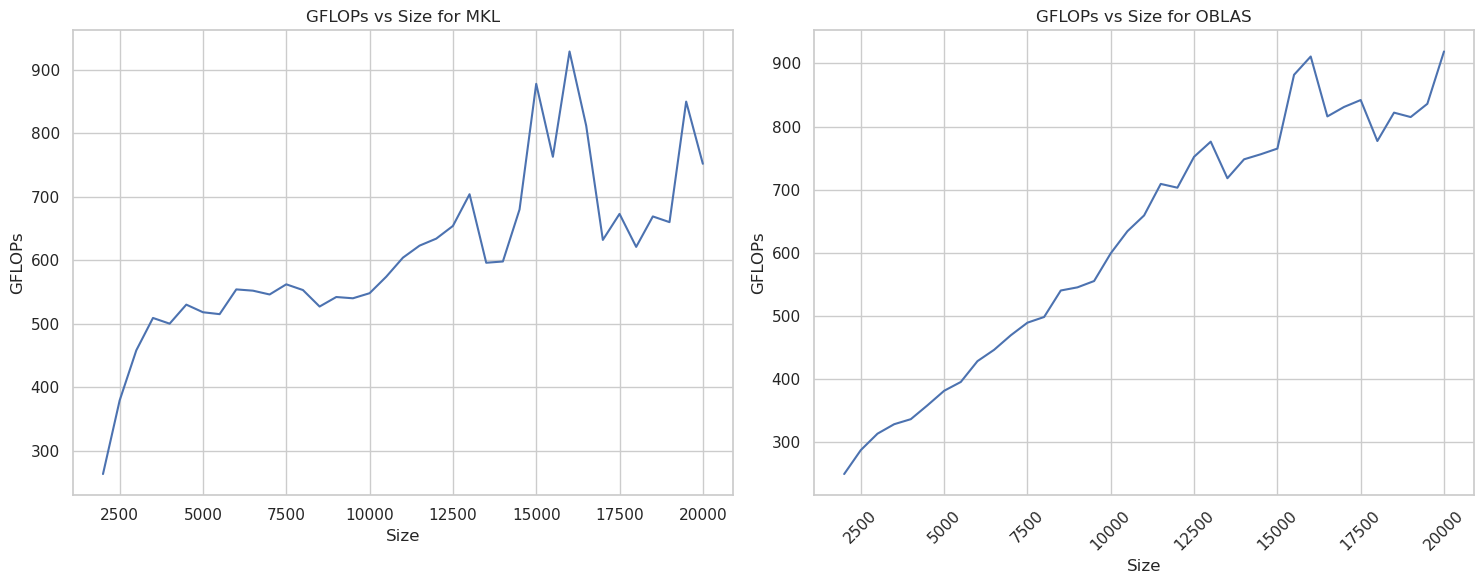

In [ ]:
# Load CSV data
csv_file_path = 'csv-outputs/MKL-output.csv'
data = pd.read_csv(csv_file_path)

# Create the plot using Seaborn
sns.set(style="whitegrid")  # Set style for the plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # Create a 1x2 grid of subplots

#Plotting MKL-outputs
sns.lineplot(x='Size', y='GFLOPs', data=data, ax=axes[0])

axes[0].set_xlabel("Size")
axes[0].set_ylabel("GFLOPs")
axes[0].set_title("GFLOPs vs Size for MKL")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

#Plotting OBLAS-outputs
csv_file_path = 'csv-outputs/OBLAS-output.csv'
data = pd.read_csv(csv_file_path)
sns.lineplot(x='Size', y='GFLOPs', data=data, ax=axes[1])

axes[1].set_xlabel("Size")
axes[1].set_ylabel("GFLOPs")
axes[1].set_title("GFLOPs vs Size for OBLAS")

# Saving image as jpg
plt.savefig("images/matrx-scaling.jpg", dpi=300)

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()  # Adjust layout for better appearance
plt.show()  # Show the plot



In [ ]:
# Lists to store extracted data
matrix_dimensions = []
mkl_gflops = []
OBLAS_gflops = []


# Read the text file line by line
with open('mkl-core-scaling', 'r') as file:
    for line in file:
        # Split line into words
        words = line.strip().split()

        # Extract x value (first number until 'x')
        value = float(words[0].split('x')[0])
        matrix_dimensions.append(value)

        # Extract y value (second-to-last word)
        gflop = int(round(float(words[-2])))
        mkl_gflops.append(int(gflop))


# # Read the text file line by line
with open('oblas-core-scaling', 'r') as file:
    for line in file:
        # Split line into words
        words = line.strip().split()

        # Extract y value (second-to-last word)
        gflop = int(round(float(words[-2])))
        OBLAS_gflops.append(int(gflop))


print(type(mkl_gflops[1]))

FileNotFoundError: [Errno 2] No such file or directory: 'mkl-core-scaling'

In [ ]:
# Set Seaborn style
sns.set(style='whitegrid')

# Create the plot
plt.figure(figsize=(10, 6))

sns.lineplot(x=matrix_dimensions, y=mkl_gflops, label='MKL')
sns.lineplot(x=matrix_dimensions, y=OBLAS_gflops, label='OBLAS')

# Set labels and title
plt.xlabel('Matrix dimensions')
plt.ylabel('GFLOPs')
plt.title('Comparison between MKL and OBLAS on dgemm.c')

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()